# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
%config Completer.use_jedi = False
%matplotlib inline

In [ ]:
pd.__version__

'1.3.5'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [9]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [10]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [11]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [91]:
cast.head(10)

## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [27]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [13]:
len(movies)

244914

### List all Batman movies ever made

In [14]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [16]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [17]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [21]:
hp_df = movies[movies.title.str.contains('Harry Potter', case=False)]
print('Total Harry Potter Movies:', len(hp_df))
#hp_df.head(10)
hp_df.sort_values(by=['year'], ascending=False)

Total Harry Potter Movies: 8


,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [ ]:
len(movies[movies.year == 2017])

### Section I - Q2 : How many movies were made in the year 2015?

In [ ]:
len(movies[movies.year == 2015])

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [32]:
len(movies[movies.year.between(2000,2018)])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [45]:
hamlet_df = movies[movies.title=='Hamlet']
print(hamlet_)

         title  year
1931    Hamlet  2009
8214    Hamlet  1976
46344   Hamlet  1921
55639   Hamlet  2000
73869   Hamlet  1948
98326   Hamlet  1990
118535  Hamlet  1913
124506  Hamlet  1911
140203  Hamlet  1954
155004  Hamlet  1964
178290  Hamlet  2014
180979  Hamlet  1987
181090  Hamlet  1910
186137  Hamlet  2015
191940  Hamlet  2016
218339  Hamlet  1973
222156  Hamlet  1969
227953  Hamlet  2011
241149  Hamlet  1996
244747  Hamlet  2017


### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [50]:
hamlet_df = hamlet_df[hamlet_df.year >= 2000]
hamlet_df.sort_values(by=['year'], ascending=False)
print(hamlet_df)

         title  year
1931    Hamlet  2009
55639   Hamlet  2000
178290  Hamlet  2014
186137  Hamlet  2015
191940  Hamlet  2016
227953  Hamlet  2011
244747  Hamlet  2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [82]:
inception_cast = cast[(cast.title == "Inception") & (cast.n.isnull())]

print("Suporting Cast #: ",len(inception_cast ))

Suporting Cast #:  27


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [83]:
inception_cast = cast[(cast.title == "Inception") & (cast.n.notnull())]
print("Main Cast #: ",len(inception_cast ))

Main Cast #:  51


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [86]:
inception_cast = inception_cast.sort_values(by=['n'], ascending=True)
print(inception_cast.head(10))

             title  year                  name     type        character     n
590576   Inception  2010     Leonardo DiCaprio    actor             Cobb   1.0
859993   Inception  2010  Joseph Gordon-Levitt    actor           Arthur   2.0
3387147  Inception  2010            Ellen Page  actress          Ariadne   3.0
940923   Inception  2010             Tom Hardy    actor            Eames   4.0
2406531  Inception  2010          Ken Watanabe    actor            Saito   5.0
1876301  Inception  2010            Dileep Rao    actor            Yusuf   6.0
1615709  Inception  2010        Cillian Murphy    actor   Robert Fischer   7.0
183937   Inception  2010          Tom Berenger    actor         Browning   8.0
2765969  Inception  2010      Marion Cotillard  actress              Mal   9.0
1826027  Inception  2010    Pete Postlethwaite    actor  Maurice Fischer  10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [104]:
albus_dumbledore = cast[(cast.character == "Albus Dumbledore")]
albus_dumbledore

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN
2248085,Potter,2015,Timothy Tedmanson,actor,Albus Dumbledore,NaN


In [103]:
albus_dumbledore["name"].drop_duplicates()

704984            Dane Farwell
792421          Michael Gambon
947789          Richard Harris
1685537    George (X) O'Connor
2248085      Timothy Tedmanson
Name: name, dtype: object

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [111]:
keanu_db = cast[(cast.name == "Keanu Reeves")]
print(len(keanu_db))

62


In [112]:
keanu_db = keanu_db[( keanu_db.year>=1999) & (keanu_db.n==1)]
keanu_db.sort_values(by=['year'], ascending=True)

,title,year,name,type,character,n
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892348,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0
1892388,The Lake House,2006,Keanu Reeves,actor,Alex Wyler,1.0
1892382,Street Kings,2008,Keanu Reeves,actor,Detective Tom Ludlow,1.0
1892385,The Day the Earth Stood Still,2008,Keanu Reeves,actor,Klaatu,1.0
1892359,Henry's Crime,2010,Keanu Reeves,actor,Henry Torne,1.0
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [117]:
available_roles = cast[(cast.year >=1950) & (cast.year<=1960)]
len(available_roles["character"])

234635

In [123]:
available_roles = cast[(cast.year.between(2007,2017))]
len(available_roles)

1452413

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [130]:
lead_roles = cast[(cast.year.between(2000,2022)) & (cast.n == 1)]
print(len(lead_roles))

60568


In [132]:
sup_roles = cast[(cast.year.between(2000,2022)) & cast.n != 1]
sup_roles = sup_roles.dropna()
print(len(sup_roles))

1265325


In [133]:
sup_extra_roles = cast[(cast.year.between(2000,2022)) & cast.n != 1]
print(len(sup_extra_roles))

2723898


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [134]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<AxesSubplot:>

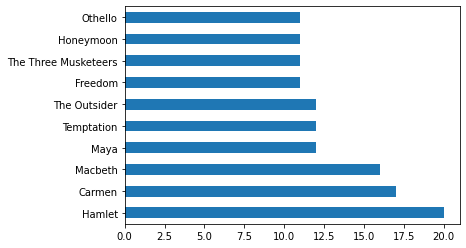

In [135]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [177]:
top_3_movies = movies[(movies.year>=2000) & ((movies.year<=2010))].year.value_counts()[:3]
print(top_3_movies)

2010    6415
2009    6125
2008    5151
Name: year, dtype: int64


### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

2010    75733
2000    39452
1990    22992
1980    21034
1970    19526
1960    17976
1950    12934
1930    10388
1920     9034
1940     8718
1910     6799
2020      285
1900       39
1890        3
2110        1
Name: year, dtype: int64


<AxesSubplot:>

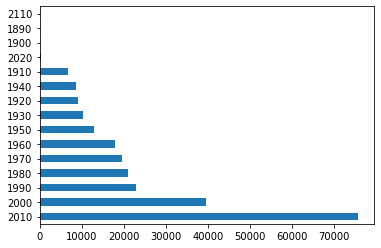

In [8]:
movies_by_decade = (movies['year']//10*10).value_counts()
movies_by_decade.plot(kind='barh')


### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [14]:
top_names = cast.name.value_counts()[:10]
top_names

Bess Flowers       835
Herman Hack        702
Sam (II) Harris    667
Lee Phelps         624
Harold Miller      624
Frank O'Connor     613
Franklyn Farnum    570
Tom London         565
Larry Steers       559
Frank Ellis        546
Name: name, dtype: int64

In [20]:
top_herself_names = cast[cast.character == "Herself"].name.value_counts()
top_herself_names.head(10)

Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marta Berrocal                6
Sumie Sakai                   6
Name: name, dtype: int64

In [21]:
top_himself_names = cast[cast.character == "Himself"].name.value_counts()
top_himself_names.head(10)

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [24]:
top_zombie_names = cast[cast.character.str.startswith("Zombie")].character.value_counts()
top_zombie_names.head(10)

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [25]:
top_Police_names = cast[cast.character.str.startswith("Police")].character.value_counts()
top_Police_names.head(10)

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

<AxesSubplot:>

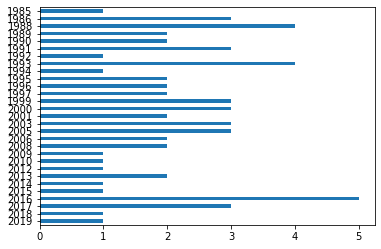

In [38]:
keanu_reeves_by_year = cast[cast.name == "Keanu Reeves"].year.value_counts().sort_index(ascending=False)
keanu_reeves_by_year.plot(kind='barh')

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


<AxesSubplot:xlabel='year', ylabel='n'>

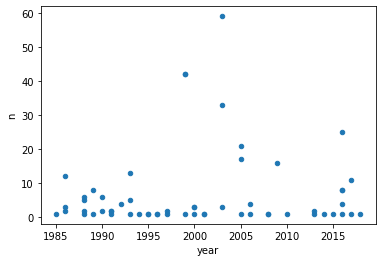

In [42]:
keanu_reeves_by_year = cast[cast.name == "Keanu Reeves"]
keanu_reeves_by_year.plot(kind='scatter',x = 'year',y='n')

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

<AxesSubplot:>

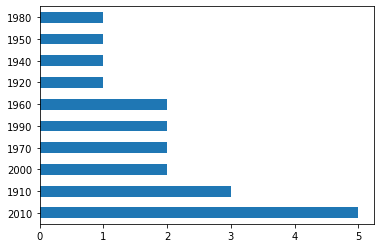

In [51]:
hamlet = movies[(movies.title == "Hamlet")] 

hamlet = (hamlet['year']//10*10).value_counts()

hamlet.plot(kind='barh')

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [55]:
lead_1960 = cast[(cast.n==1) & cast.year.between(1960,1969)]
print(len(lead_1960))

11823


In [56]:
lead_2000 = cast[(cast.n==1) & cast.year.between(2000,2009)]
print(len(lead_2000))

26344


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [88]:
frank_oz = cast[cast.name == "Frank Oz"]
frank_oz = frank_oz[frank_oz.duplicated(subset=['title'], keep=False)]
frank_oz = frank_oz.drop_duplicates(subset=['title'])
frank_oz.sort_values("year")

,title,year,name,type,character,n
1723645,The Muppet Movie,1979,Frank Oz,actor,Miss Piggy,2.0
1723598,An American Werewolf in London,1981,Frank Oz,actor,Mr. Collins,13.0
1723632,The Great Muppet Caper,1981,Frank Oz,actor,Miss Piggy,2.0
1723629,The Dark Crystal,1982,Frank Oz,actor,"Aughra, a Keeper Of Secrets (performer)",3.0
1723653,The Muppets Take Manhattan,1984,Frank Oz,actor,Miss Piggy,2.0
1723601,Follow That Bird,1985,Frank Oz,actor,Cookie Monster,3.0
1723638,The Muppet Christmas Carol,1992,Frank Oz,actor,Miss Piggy as Emily Cratchit,5.0
1723608,Muppet Treasure Island,1996,Frank Oz,actor,Miss Piggy,14.0
1723612,Muppets from Space,1999,Frank Oz,actor,Miss Piggy,7.0
1723625,The Adventures of Elmo in Grouchland,1999,Frank Oz,actor,Bert,16.0


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [98]:
frank_oz = cast[cast.name == "Frank Oz"]
frank_oz = frank_oz[frank_oz.duplicated(subset=['character'], keep=False)]
frank_oz = frank_oz.drop_duplicates(subset=['character'])
frank_oz

,title,year,name,type,character,n
1723599,An American Werewolf in London,1981,Frank Oz,actor,Miss Piggy,13.0
1723601,Follow That Bird,1985,Frank Oz,actor,Cookie Monster,3.0
1723602,Follow That Bird,1985,Frank Oz,actor,Bert,3.0
1723603,Follow That Bird,1985,Frank Oz,actor,Grover,3.0
1723609,Muppet Treasure Island,1996,Frank Oz,actor,Fozzie Bear,14.0
1723610,Muppet Treasure Island,1996,Frank Oz,actor,Sam the Eagle,14.0
1723611,Muppet Treasure Island,1996,Frank Oz,actor,Animal,14.0
1723618,Star Wars: Episode I - The Phantom Menace,1999,Frank Oz,actor,Yoda,12.0


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

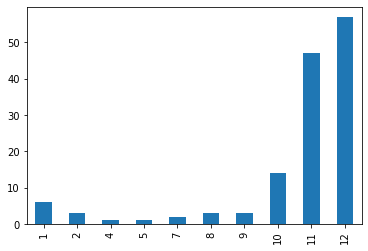

In [99]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

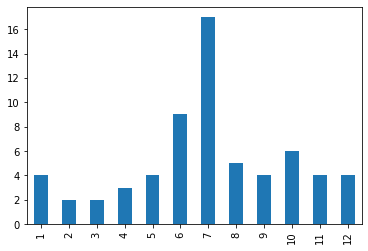

In [105]:
release_dates
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

<AxesSubplot:>

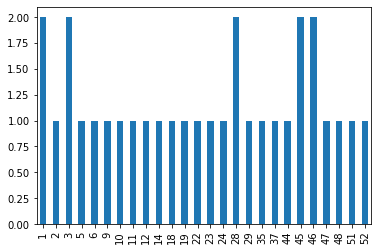

In [107]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.isocalendar().week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [124]:
keanu_db_cast = cast[(cast.name == "Keanu Reeves") & (cast.n==1)]
keanu_release_dates = release_dates[(release_dates.country == 'USA')]
keanu_db_cast = keanu_db_cast.merge(keanu_release_dates, on=["title"]) 
keanu_db_cast

,title,year_x,name,type,character,n,year_y,country,date
0,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0,2013,USA,2013-12-25
1,A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0,1995,USA,1995-08-11
2,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0,1991,USA,1991-07-19
3,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,1989,USA,1989-02-17
4,Chain Reaction,1996,Keanu Reeves,actor,Eddie Kasalivich,1.0,1996,USA,1996-08-02
5,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0,2005,USA,2005-02-18
6,Feeling Minnesota,1996,Keanu Reeves,actor,Jjaks Clayton,1.0,1996,USA,1996-09-13
7,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0,2001,USA,2001-09-14
8,John Wick,2014,Keanu Reeves,actor,John Wick,1.0,2014,USA,2014-10-24
9,John Wick: Chapter 2,2017,Keanu Reeves,actor,John Wick,1.0,2017,USA,2017-02-10


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

<AxesSubplot:>

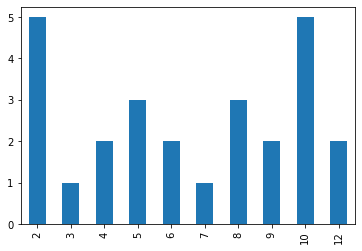

In [126]:
keanu_db_cast.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

<AxesSubplot:>

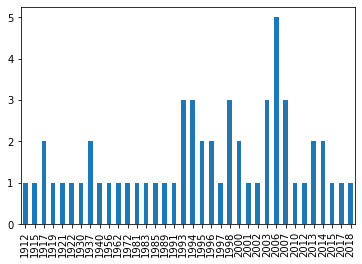

In [127]:
ian_db_cast = cast[(cast.name == "Ian McKellen")]
ian_release_dates = release_dates[(release_dates.country == 'USA')]
ian_db_cast = ian_db_cast.merge(ian_release_dates, on=["title"]) 
ian_db_cast.date.dt.year.value_counts().sort_index().plot(kind='bar')
